#### Fourier Transform
We will use the  fftpack of scipy library (http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html) to calculate the Fourier Transform of some signals. 

In [1]:
### importing the library
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Let's plot again the signal in time domain
* N.B. I introduced the variable 'sampling'. It was there also in the previous post, but  none noticed it :)

This variable will be important when I'll talk about the sampling theorem and how 'good' we are able to reproduce a continuous signal in a digital one.

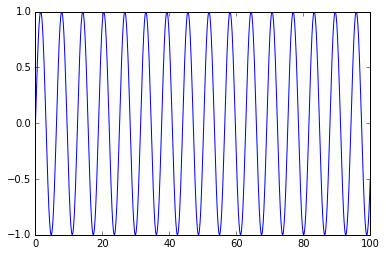

In [2]:
##number of point of the time series
sampling=1024
nsample = 100
## simulate a simple sinusoidal function
x1 = np.linspace(0, nsample, sampling)
y=np.sin(x1)
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data")

In [3]:
from scipy.fftpack import fft
yf = fft(y)



We know that the output of the forward Fourier transform is an array of complex values, so in order to plot the "frequency" content of a signal we need to plot its absolute value. 

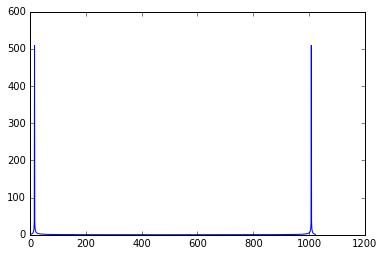

In [4]:
plt.plot(np.abs(yf))

We know that the signal contains 1 single frequency, which is the frequency of our sinusoidal function. Why we have 2 lines in this plot?

#### Citing scipy.fftpack documentation:

"For N even, the elements y[1]...y[N/2−1] contain the positive-frequency terms, and the elements y[N/2]...y[N−1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N−1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N−1]
contain the negative- frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of y[n]
for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted."

If you are interested in reading some book on signal processing, I suggested this book:
*Introduction to
Signal Processing
Sophocles J. Orfanidis 
published by Pearson Education, Inc. Copyright (c) 1996--2009 by Prentice Hall, Inc. Previous ISBN 0-13-209172-0. *

I have the printed Prentice Hall copy, but I just discovered that you can download it for free in pdf format: 
http://www.ece.rutgers.edu/~orfanidi/intro2sp/
with this beautiful 
 #### Copyright Notice
*This book was previously published by Pearson Education, Inc. Copyright (c) 1996--2009 by Prentice Hall, Inc. Previous ISBN 0-13-209172-0.
The book's copyrights were transferred from Prentice Hall to Sophocles J. Orfanidis in 2009. A new version of the book, that includes corrections of all the typos, is now freely available in PDF format, and in a 2-up form. A solutions manual is available. A printed version is also available as a size-6x9 paperback.
Copyright (c) 2010 by Sophocles J. Orfanidis, All Rights Reserved.
Links to the book's web page, http://www.ece. rutgers.edu/~orfanidi/intro2sp/ , may be placed on any web site. Any part of this book may be downloaded and printed for personal or educational use only, as long as the printed or photocopied pages are not altered in any way from the original PDF file posted on the book's web page.
No part of this book may be reproduced, altered in any way, or transmitted in any form for commercial, profit, sale, or marketing purposes.



##### So, we need only to plot the half of the points of the yf vector to have all the info we need about the frequency content of the signal*

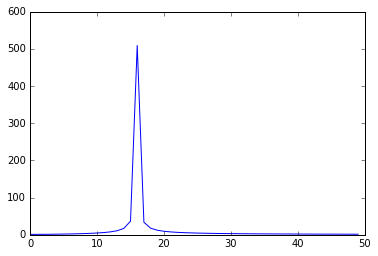

In [5]:
plt.plot(np.abs(yf[0:nsample/2]))

Perfect! We had 1 frequency in our signal (the oscillation frequency of our sinusoidal signal) and we found 1 frequency.
Now let's try to understand a bit more of the 'physical' content of this 2 representation'

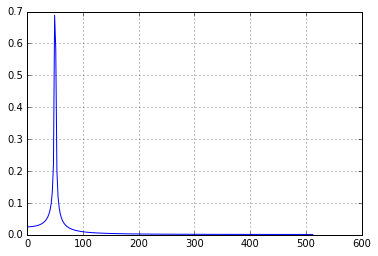

In [6]:
# sample spacing
sampling=1024
nsample = 500
dt = 1.0 / sampling
x = np.linspace(0.0, nsample*dt,nsample)
nu=50.0
y = np.sin(nu * 2.0*np.pi*x) 
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), nsample/2)
plt.plot(xf, 2.0/nsample * np.abs(yf[0:nsample/2]))
plt.grid()
plt.show()

So we have simulated a sine function with frequency nu=50Hz, we have sampled this signal with a sampling frequency "sampling=1024Hz", so we generated 1 time point each dt=1/sampling times
Our total observation time is T=dt \* nsample sec.


### Questions
- What happen if we use longer nsample?
- What happen if we use smaller sampling frequency?